In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
market = pd.read_csv('/content/drive/MyDrive/Market_data_set.csv')
market.head(10)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium
5,36,96.66,1,3479.76,Shipped,4,10,2003,Motorcycles,95,6,S10_1678,6,USA,Medium
6,29,86.13,9,2497.77,Shipped,4,11,2003,Motorcycles,95,7,S10_1678,7,France,Small
7,48,100.00,1,5512.32,Shipped,4,11,2003,Motorcycles,95,8,S10_1678,8,Norway,Medium
8,22,98.57,2,2168.54,Shipped,4,12,2003,Motorcycles,95,9,S10_1678,9,USA,Small
9,41,100.00,14,4708.44,Shipped,1,1,2004,Motorcycles,95,10,S10_1678,10,France,Medium


In [ ]:
# get the number of rows and columns

market.shape

NameError: ignored

In [ ]:
# get the column data types

market.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
Product_SK           int64
PRODUCTCODE         object
Customer_SK          int64
COUNTRY             object
DEALSIZE            object
dtype: object

In [ ]:
# get a count of the empty values for each columns

market.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
Product_SK         0
PRODUCTCODE        0
Customer_SK        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
# check for any missing or null values

market.isnull().values.any()

False

In [ ]:
# get a count of the number of small, medium and large dealsize

market['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

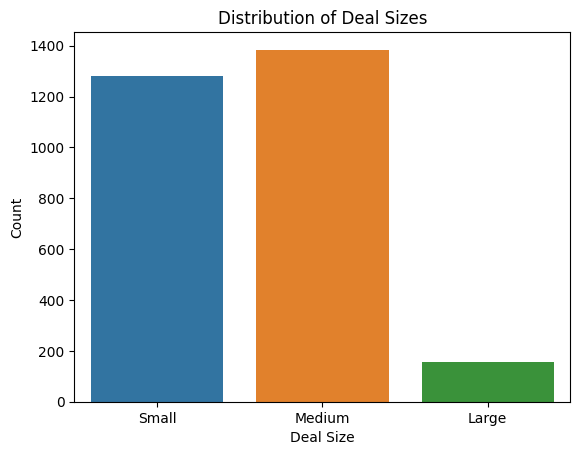

In [ ]:
# visualize

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='DEALSIZE', data=market)

plt.xlabel('Deal Size')
plt.ylabel('Count')
plt.title('Distribution of Deal Sizes')

plt.show()

In [ ]:
# print all of the columns and their unique values

for column in market.columns:
  if market[column].dtype == 'object':
    print(str(column) + ' : ' + str(market[column].unique()))
    print(market[column].value_counts())
    print('----------------------------------------------------------------------------')

STATUS : ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64
----------------------------------------------------------------------------
PRODUCTLINE : ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64
----------------------------------------------------------------------------
PRODUCTCODE : ['S10_1678' 'S10_1949' 'S10_2016' 'S10_4698' 'S10_4757' 'S10_4962'
 'S12_1099' 'S12_1108' 'S12_1666' 'S12_2823' 'S12_3148' 'S12_3380'
 'S12_3891' 'S12_3990' 'S12_4473' 'S12_4675' 'S18_1097' 'S18_1129'
 'S18_1342' 'S18_1367' 'S18_1589' 'S18_1662' 'S18_1749' 'S18_1889'
 'S18_1984' 'S18_2238' 'S18_2248' 'S18_

In [ ]:
market.head(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium


In [ ]:
# remove unwanted columns

market = market.drop('Product_SK', axis = 1)
market = market.drop('Customer_SK', axis = 1)

In [ ]:
# get the correlation

market.corr()

<ipython-input-21-7da7e1d94e99>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market.corr()


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
QUANTITYORDERED,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


<ipython-input-24-e17cb8974057>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(market.corr(),annot=True, fmt = '.0%')


<Axes: >

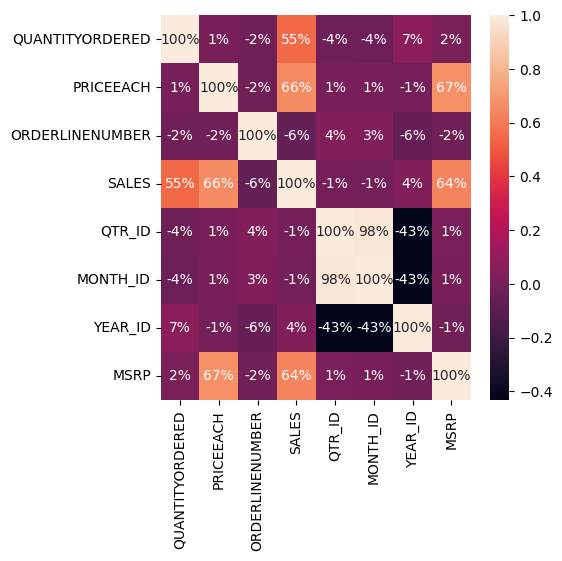

In [ ]:
# visualize the correlation

plt.figure(figsize = (5,5))
sns.heatmap(market.corr(),annot=True, fmt = '.0%')

In [ ]:
# Transorm the data
# Transform the non-numerical data into numerical data

from sklearn.preprocessing import LabelEncoder

for column in market.columns:
  if market[column].dtype == np.number:
    continue
  market[column] = LabelEncoder().fit_transform(market[column])

<ipython-input-25-7ae7a54e701a>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if market[column].dtype == np.number:
<ipython-input-25-7ae7a54e701a>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if market[column].dtype == np.number:
<ipython-input-25-7ae7a54e701a>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if market[column].dtype == np.number:
<ipython-input-25-7ae7a54e701a>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if market[column].dtype == np.number:
<ipython-input-25-7ae7a54e701a>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a

In [ ]:
market

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,19,95.70,1,2871.00,5,0,1,0,1,39,0,18,2
1,23,81.35,4,2765.90,5,1,4,0,1,39,0,6,2
2,30,94.74,1,3884.34,5,2,6,0,1,39,0,6,1
3,34,83.26,5,3746.70,5,2,7,0,1,39,0,18,1
4,38,100.00,13,5205.27,5,3,9,0,1,39,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,9,100.00,14,2244.40,5,3,11,1,3,10,108,14,2
2819,18,100.00,0,3978.51,5,0,0,2,3,10,108,5,1
2820,32,100.00,3,5417.57,4,0,2,2,3,10,108,14,1
2821,23,62.24,0,2116.16,5,0,2,2,3,10,108,6,2


In [ ]:
# split the dataset

from sklearn.model_selection import train_test_split

X = market.drop(columns =  ['DEALSIZE']) # features
y = market['DEALSIZE'] # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [ ]:
# build model

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming 3 classes for DEALSIZE
])

In [ ]:
# compile

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the model

model.fit(X_train , y_train , epochs = 10 , batch_size = 32)

Epoch 1/10
71/71 [==============================] - 1s 2ms/step - loss: -72.5851 - accuracy: 0.4380
Epoch 2/10
71/71 [==============================] - 0s 2ms/step - loss: -382.8745 - accuracy: 0.4925
Epoch 3/10
71/71 [==============================] - 0s 2ms/step - loss: -874.9038 - accuracy: 0.4925
Epoch 4/10
71/71 [==============================] - 0s 2ms/step - loss: -1638.6732 - accuracy: 0.4925
Epoch 5/10
71/71 [==============================] - 0s 2ms/step - loss: -2748.9438 - accuracy: 0.4925
Epoch 6/10
71/71 [==============================] - 0s 2ms/step - loss: -4282.7725 - accuracy: 0.4925
Epoch 7/10
71/71 [==============================] - 0s 2ms/step - loss: -6221.9912 - accuracy: 0.4925
Epoch 8/10
71/71 [==============================] - 0s 2ms/step - loss: -8634.1914 - accuracy: 0.4925
Epoch 9/10
71/71 [==============================] - 0s 2ms/step - loss: -11467.6797 - accuracy: 0.4925
Epoch 10/10
71/71 [==============================] - 0s 2ms/step - loss: -14723.2188 

In [ ]:
# model evaluation

test_loss , test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

18/18 [==============================] - 0s 2ms/step - loss: -9099.3613 - accuracy: 0.4814
Test accuracy: 0.48141592741012573


In [ ]:
# prediction

predictions = model.predict()